<h1>Problem statement</h1>

Machine Learning is revolutionizing the healthcare industry worldwide. Detection of diseases has been much easier with the widespread application of ML. Using the given dataset, In this Notebook a ML model is being built  which will detect if a person has Chronic Kidney Disease(ckd) or not. Use Decision Trees and Random forest for the model.



---



---



### Feature Fullname:
* id -id
* age -age
* bp -blood pressure
* sg -specific gravity
* al -albumin
* su -sugar
* rbc -red blood cells
* pc - pus cell
* pcc -pus cell clumps
* ba -bacteria
* bgr -blood glucose random
* bu -blood urea
* sc -serum creatinine
* sod -sodium
* pot -potassium
* hemo -haemoglobin
* pcv -packed cell volume
* wc -white blood cell count
* rc -red blood cell count
* htn -hypertension
* dm -diabetes mellitus
* cad -coronary artery disease
* appet -appetite
* pe -pedal edema
* ane -anemia
* classification -class

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/Gdrive')

Drive already mounted at /content/Gdrive; to attempt to forcibly remount, call drive.mount("/content/Gdrive", force_remount=True).


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---



---



# Shallow Data Analysis

In [ ]:
#making data set
df=pd.read_csv('/content/Gdrive/MyDrive/kidney_disease.csv')

In [ ]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.02,1.02,1.01,1.005,1.01
al,1,4,2,4,2
su,0,0,3,0,0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
#chcking if there is any duplicat value or not
sum(df.duplicated())

0

In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Although , pcv ,wc and rc are of object type but generically they are of neumerical type .

* To convert this to neumerical type ,we are using a .to_neumeric function in Pandas.

In [ ]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')    
    #whereever we have alphabetic values , this errors parameter will replace alphabets with NaN . 

In [ ]:
features=['rc','pcv','wc']
for i in features:
    convert_dtype(df,i)

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

**Now pcv ,wc and rc are of float type**

## <h1>Data cleaning</h1>

In [ ]:
df.drop('id',inplace=True,axis=1)

In [ ]:
#identifying categorical and neumeric columns
def extract_cat_num(df):
    col_cat =[col for col in df.columns if df[col].dtype=='O'] # 'O'=> (pythonic) object type
    col_num =[col for col in df.columns if df[col].dtype!='O']
    return col_cat,col_num

In [ ]:
cat,num=extract_cat_num(df)

In [ ]:
cat

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
num

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [ ]:
# dirtiness in categorical data
for col in cat:
    print(f' \'{col}\' column has {df[col].unique()} values')
    print("\n")

 'rbc' column has [nan 'normal' 'abnormal'] values


 'pc' column has ['normal' 'abnormal' nan] values


 'pcc' column has ['notpresent' 'present' nan] values


 'ba' column has ['notpresent' 'present' nan] values


 'htn' column has ['yes' 'no' nan] values


 'dm' column has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


 'cad' column has ['no' 'yes' '\tno' nan] values


 'appet' column has ['good' 'poor' nan] values


 'pe' column has ['no' 'yes' nan] values


 'ane' column has ['no' 'yes' nan] values


 'classification' column has ['ckd' 'ckd\t' 'notckd'] values




In [ ]:
df['dm'] =df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=False)
df['cad'] =df['cad'].replace(to_replace={'\tno':'no'},inplace=False)
df['classification'] =df['classification'].replace(to_replace={'ckd\t':'ckd' },inplace=False)

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
# no dirtiness
for col in cat:
    print(f' \'{col}\' column has {df[col].unique()} values')
    print("\n")

 'rbc' column has [nan 'normal' 'abnormal'] values


 'pc' column has ['normal' 'abnormal' nan] values


 'pcc' column has ['notpresent' 'present' nan] values


 'ba' column has ['notpresent' 'present' nan] values


 'htn' column has ['yes' 'no' nan] values


 'dm' column has ['yes' 'no' ' yes' nan] values


 'cad' column has ['no' 'yes' nan] values


 'appet' column has ['good' 'poor' nan] values


 'pe' column has ['no' 'yes' nan] values


 'ane' column has ['no' 'yes' nan] values


 'classification' column has ['ckd' 'notckd'] values




In [ ]:
# dirtiness in neumeric data
for col in num:
    print(f' \'{col}\' column has {df[col].unique()} values')
    print("\n")

 'age' column has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values


 'bp' column has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values


 'sg' column has [1.02  1.01  1.005 1.015   nan 1.025] values


 'al' column has [ 1.  4.  2.  3.  0. nan  5.] values


 'su' column has [ 0.  3.  4.  1. nan  2.  5.] values


 'bgr' column has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 1

In [ ]:
len(num)

14

In [ ]:
num

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

## Exploratory Data Analysis

Analysing distribution of each and every column

In [ ]:
len(cat)

11

In [ ]:
cat

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

##### Check Label distribution of categorical Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

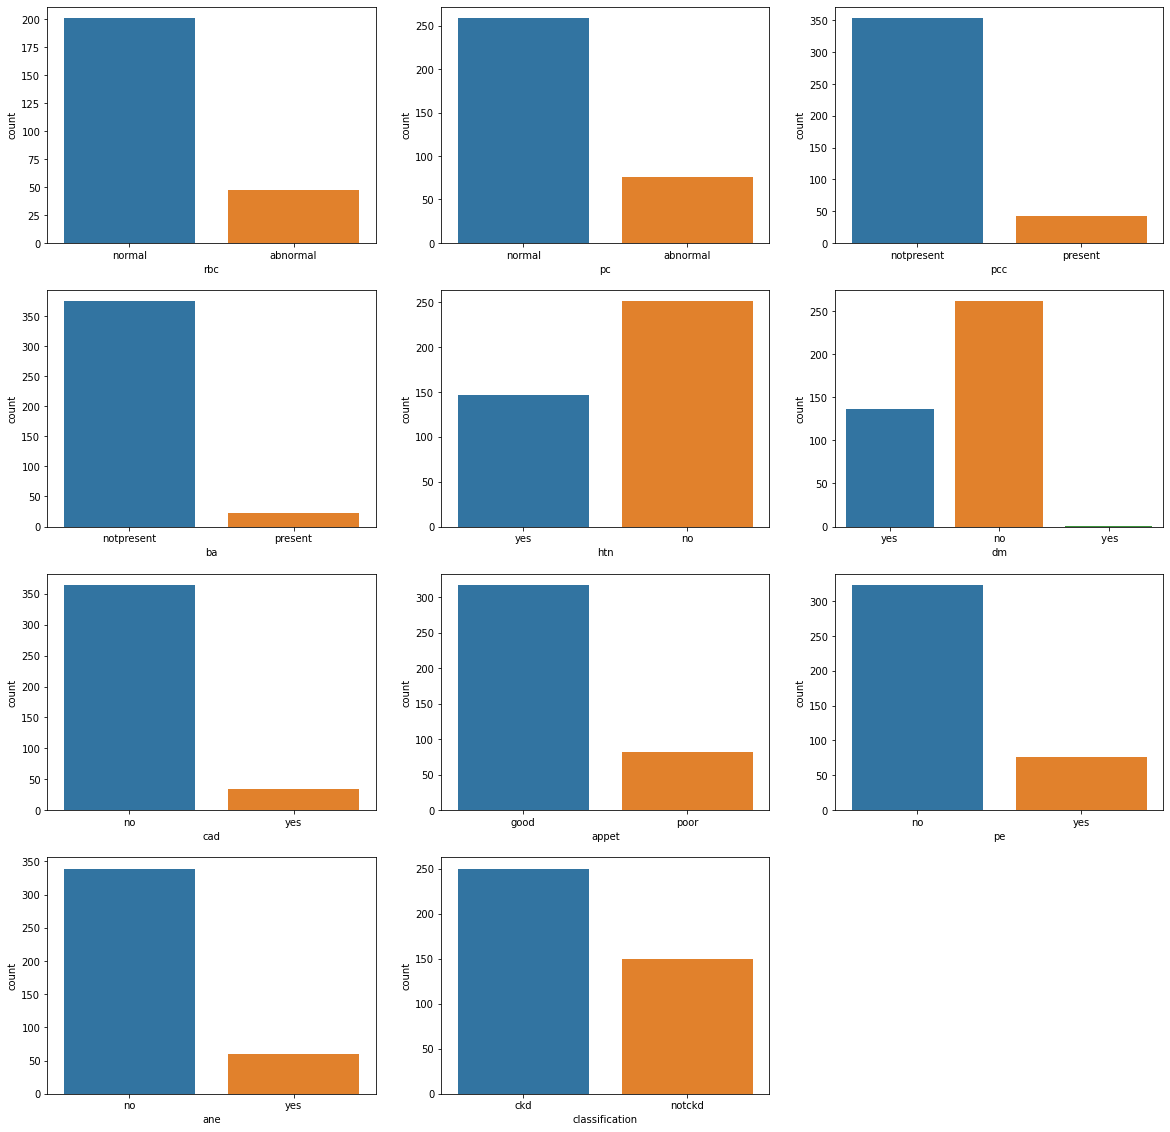

In [ ]:
plt.figure(figsize=(20,20))

for i,feat_name in enumerate(cat):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feat_name])

***Almost all categorical features has data imbalance***

In [ ]:
#There are so many warnings so we want to ignore them for more covinience
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

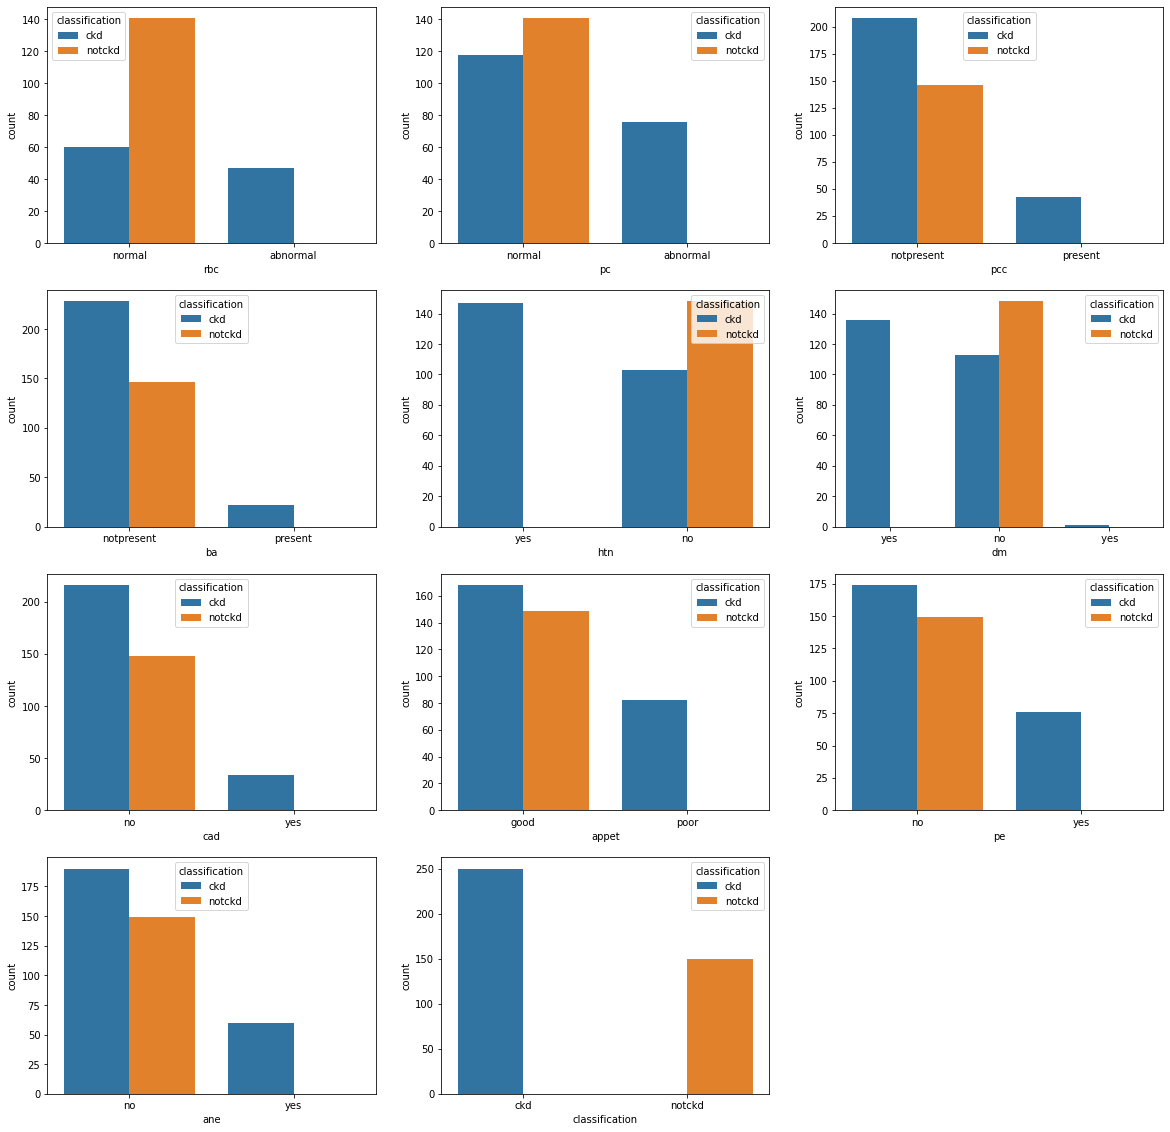

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature],hue=df['classification'])



1.   ***If any patient has rbc abnormality ,he has not any ckd***
2.   ***If pc is abnormal ,no ckd***

obseving all other features , this ambiguity can be observed .



"\nsns.countplot(df['classification'])\n"

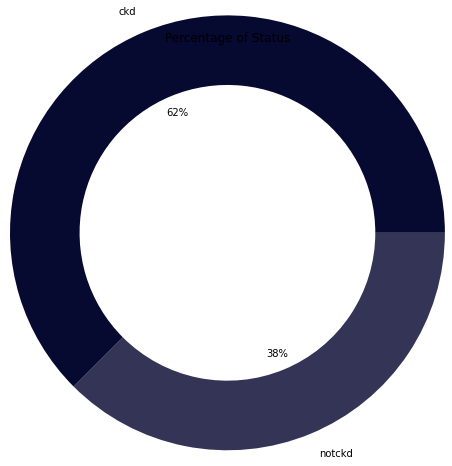

In [ ]:
# frequency of Status
base_freq = df.classification.value_counts()

# ploting a pie chart to show the percentage of rides for each base
plt.pie(base_freq.values, labels=base_freq.index,
        radius=2.5,
        autopct='%.0f%%',
        wedgeprops=dict(width=0.8),
        colors=['#060930','#333456','#595b83','#f4abc4','grey'])
plt.title('Percentage of Status', y=1.35)

'''
sns.countplot(df['classification'])
'''

*$\exists$ a little data imbalance between ckd and notckd.*

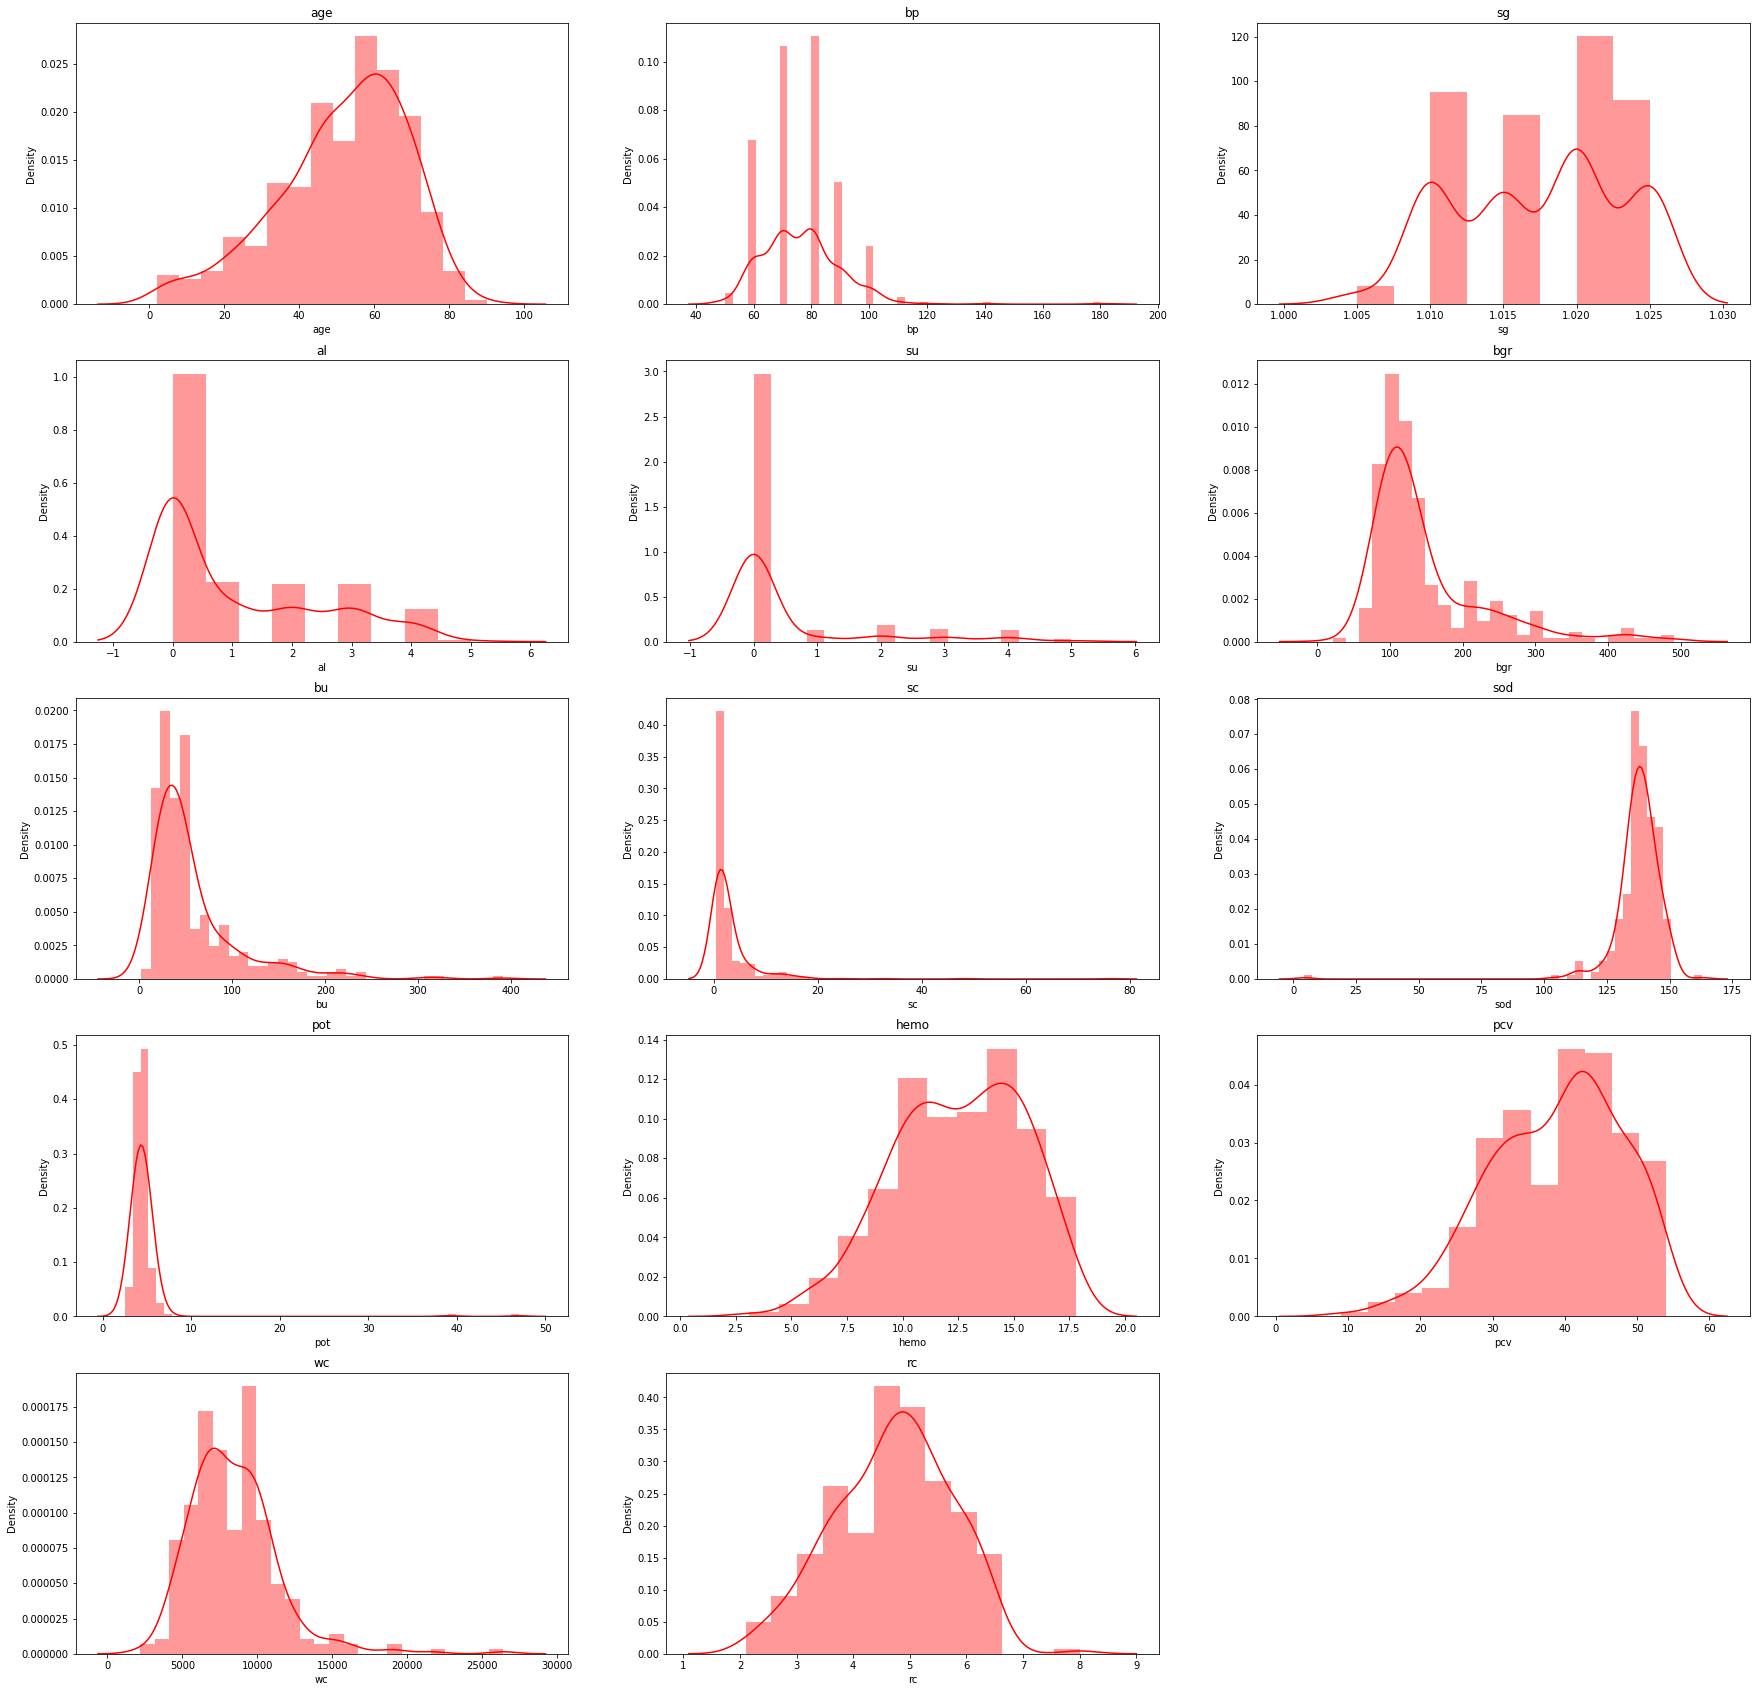

In [ ]:
#univeriate graph to visulise the distribution

plt.figure(figsize=(30,30))
for i,feature in enumerate(num):
    plt.subplot(5,3,i+1)            
    sns.distplot(df[feature] ,color ='red')
    plt.title(feature)



1.   al has the maximum value around 0
2.   pot column has all the values at 5 only .
3.   su has values around 0
4.   sc has all values around 0 and 10 



## Correlation between features

In [ ]:
df.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


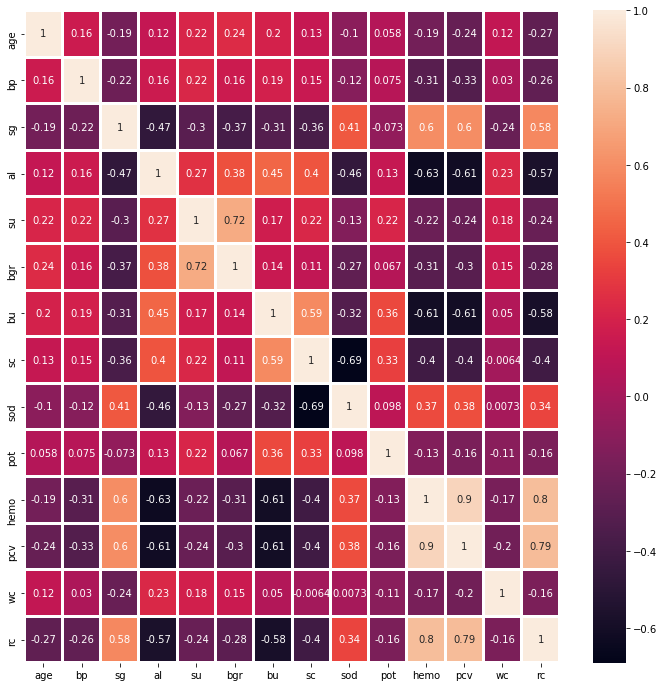

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'),cbar=True,annot=True ,linewidths=2)

* rc count is positively correlated with sg,hemo,pcv .
* rc count is negatively correlated with al, bu.
* hemo and al are negatively correlated .
* pcv and hemo are highly positive correlated .
* pcv is negatively correlated with al and bu .


In [ ]:
df['rc']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rc, Length: 400, dtype: float64

In [ ]:
df.groupby(['rbc','classification'])['rc'].agg(['mean' ,'count' ])

mean  count
rbc      classification                 
abnormal ckd             3.832000     25
normal   ckd             3.782500     40
         notckd          5.368657    134

We can observe that when a person is not diseased its rbc count is 134, mean is also high whereas when he is diseased count drop downs to 25-40 and mean is low.

#### Relationship between haemoglobin and packed cell volume

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

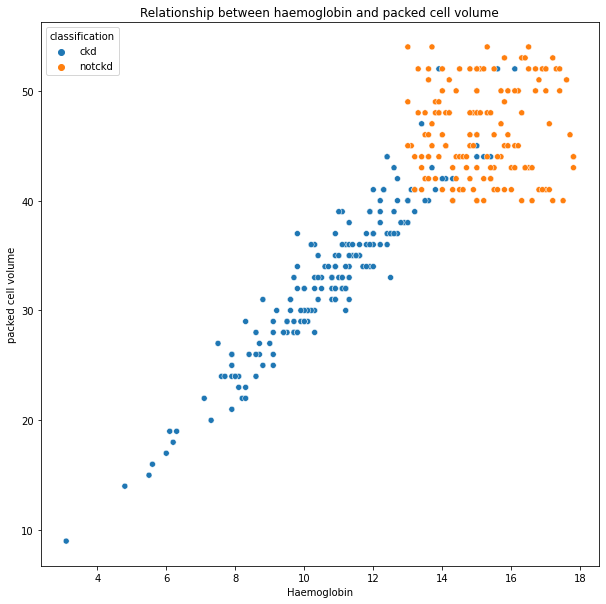

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df.hemo,y=df['pcv'] ,hue =df['classification'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')


We can see that there is a linear relationship between haemoglobin and pacled cell volume

* Those who are not diseased ,they all have high hemoglobin and high pcv value .

In [ ]:
df.ane

0       no
1       no
2      yes
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: ane, Length: 400, dtype: object

Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

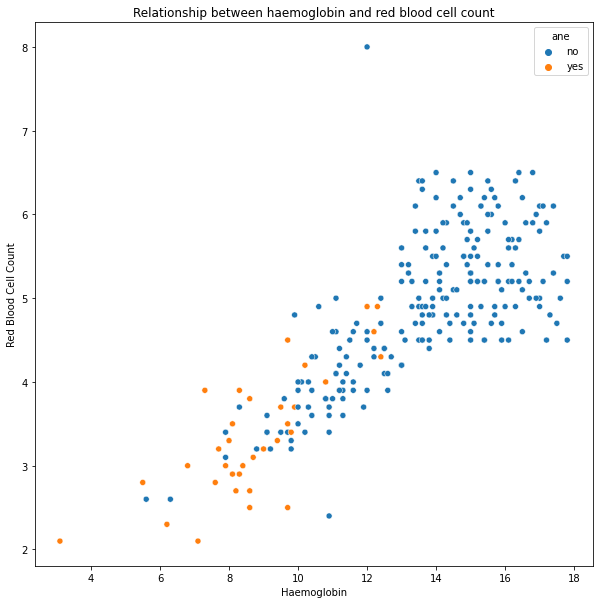

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df.hemo,y=df['rc'] ,hue =df['ane'])
plt.xlabel('Haemoglobin')
plt.ylabel('Red Blood Cell Count')
plt.title('Relationship between haemoglobin and red blood cell count')




*   The patients ho has anemia has low haemoglobin and Red Blood Cell Count .



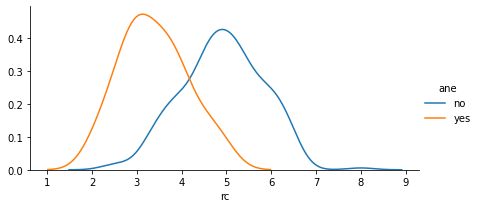

In [ ]:
grid=sns.FacetGrid(df,hue='ane',aspect=2)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

### Analyse distribution of red blood cell count chronic as well as non chronic

"\ngrid=sns.FacetGrid(df,hue='classification',aspect=2)\ngrid.map(sns.kdeplot,'rc')\ngrid.add_legend()\n\n"

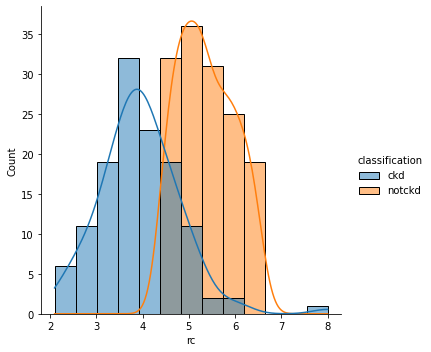

In [ ]:
sns.displot(data =df ,x ='rc' ,hue ='classification' ,kde =True )

'''
grid=sns.FacetGrid(df,hue='classification',aspect=2)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

'''

from above visuals we can say that person with lower rbc count have high chances of having chronic disease

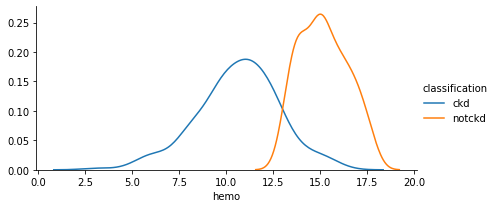

In [ ]:
grid=sns.FacetGrid(df,hue='classification',aspect=2)
grid.map(sns.kdeplot,'hemo')
grid.add_legend()

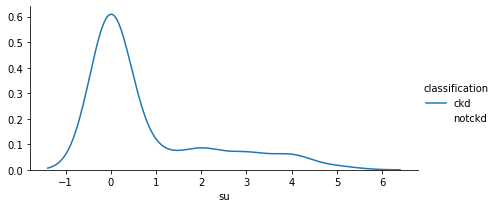

In [ ]:
grid=sns.FacetGrid(df,hue='classification',aspect=2)
grid.map(sns.kdeplot, 'su')
grid.add_legend()

* The most of the  patients has sugar around 0 .

Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

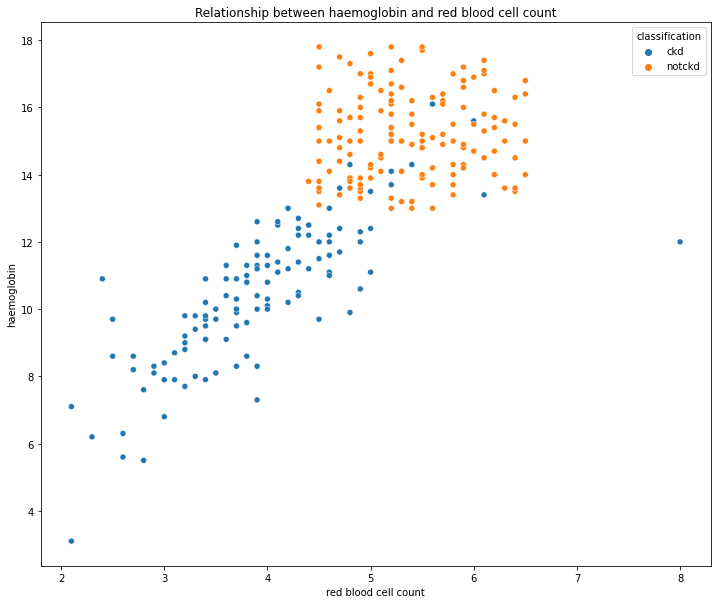

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['rc'],y=df['hemo'],hue=df['classification'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

Text(0.5, 1.0, 'Relationship between red blood cell count and packed cell volume')

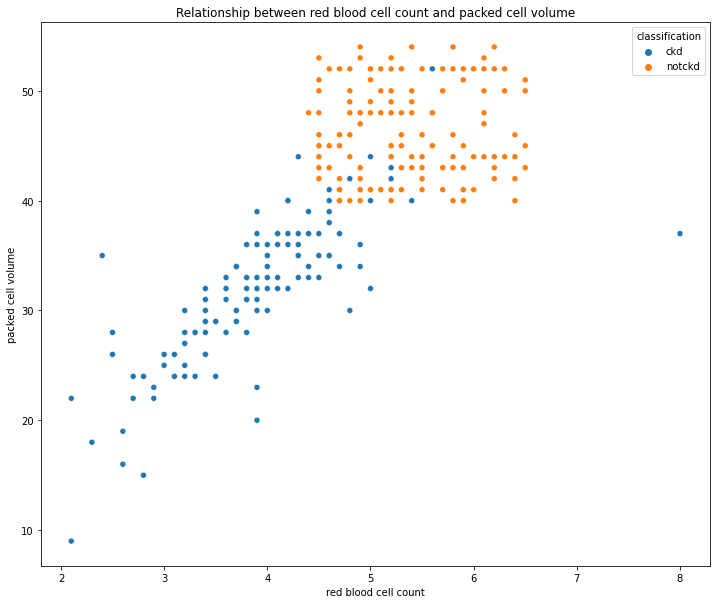

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['rc'],y=df['pcv'],hue=df['classification'])
plt.xlabel('red blood cell count')
plt.ylabel('packed cell volume')
plt.title('Relationship between red blood cell count and packed cell volume')


* We can see that there is some kind of linearity in all the relationships
* Whenever haemoglobin is below 13-14 he is positive for chronic disease , Whenever haemoglobin is near 18 he is negative

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

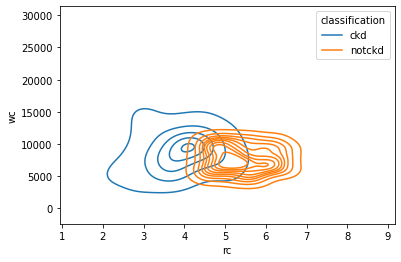

In [ ]:
# sns.displot(data=df, x='rc', y='wc',kind='kde' ,height=8, aspect=1 ,rug =True)

sns.kdeplot(
    data=df, x="rc", y="wc", hue="classification", fill=False,
)



*   So, ckd and notckd distribution does have different distributions w.r.t. rc and wc. 




## Handling Missing Values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
dtype: int64

We can fill this missing values with mean,median or std deviat

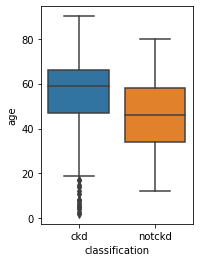

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(df['classification'],y=df['age'])

In [ ]:
list(enumerate(num))

[(0, 'age'),
 (1, 'bp'),
 (2, 'sg'),
 (3, 'al'),
 (4, 'su'),
 (5, 'bgr'),
 (6, 'bu'),
 (7, 'sc'),
 (8, 'sod'),
 (9, 'pot'),
 (10, 'hemo'),
 (11, 'pcv'),
 (12, 'wc'),
 (13, 'rc')]

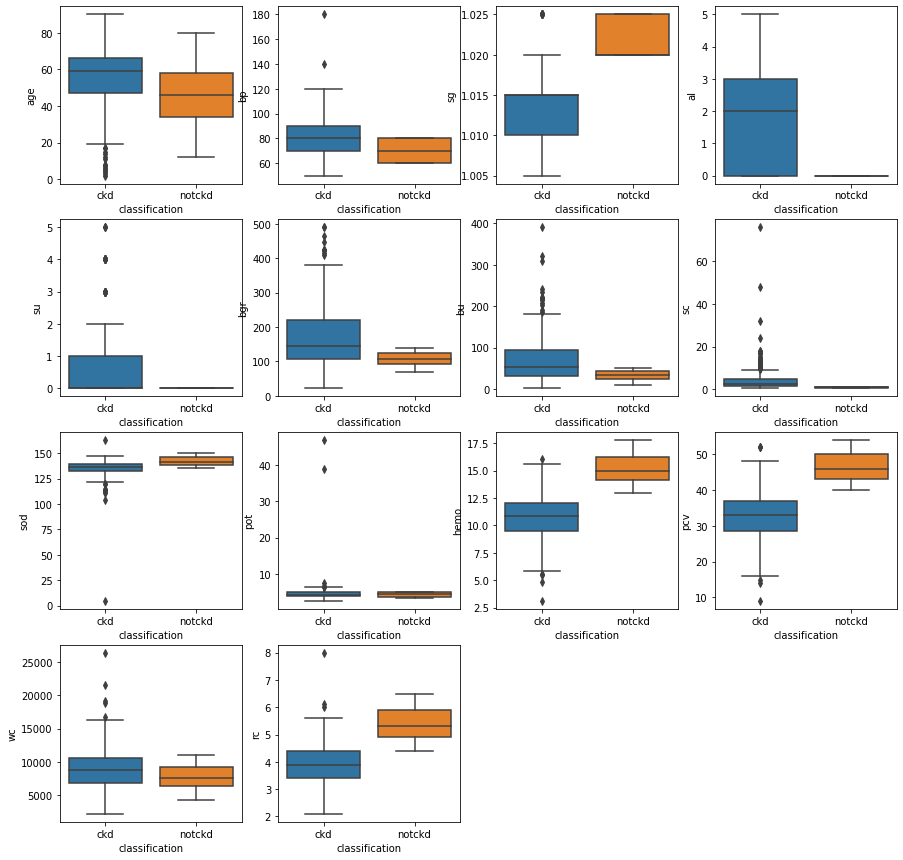

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=df['classification'],y=i[1],data=df.reset_index())

***There are outliers in each features of the  dataset so filling missing values with mean is not feasible , median to fill missing values will be most compatible.***

In [ ]:
np.mean(df)

age       51.483376
bp        76.469072
sg         1.017408
al         1.016949
su         0.450142
bgr      148.036517
bu        57.425722
sc         3.072454
sod      137.528754
pot        4.627244
hemo      12.526437
pcv       38.884498
wc      8406.122449
rc         4.707435
dtype: float64

In [ ]:
num

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [ ]:
for i in num:
    df[i].fillna(df[i].median(),inplace=True)

In [ ]:
df.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

#### Filling missing values in categorical columns using random values

In [ ]:
df['rbc'].isnull().sum()

152

In [ ]:
random_sample=df['rbc'].dropna().sample(152)

In [ ]:
random_sample

347    normal
2      normal
133    normal
360    normal
379    normal
        ...  
328    normal
212    normal
279    normal
387    normal
393    normal
Name: rbc, Length: 152, dtype: object

In [ ]:
df[df['rbc'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [ ]:
random_sample.index

Int64Index([347,   2, 133, 360, 379, 171, 144, 354, 246, 384,
            ...
            248, 190,  34, 289,  83, 328, 212, 279, 387, 393],
           dtype='int64', length=152)

We can see that indexes are different , while putting random values indexes must be equal

In [ ]:
random_sample.index=df[df['rbc'].isnull()].index    #in this way index will be equal

In [ ]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [ ]:
df.loc[df['rbc'].isnull(),'rbc']=random_sample

In [ ]:
df['rbc'].isnull().sum()

0

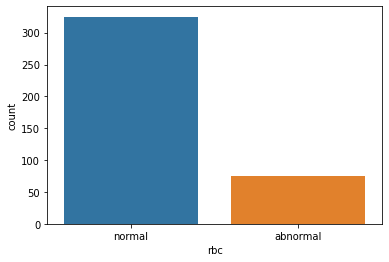

In [ ]:
sns.countplot(df['rbc'])       # checking that ratio didnt change after filling missing values

ratio didnt changed

In [ ]:
list(df.su.unique())

[0.0, 3.0, 4.0, 1.0, 2.0, 5.0]

In [ ]:
#filling random values in all categorical columns
def Random_value_Imputation(feature):

  random_sample= df[feature].dropna().sample(df[feature].isnull().sum())
  random_sample.index=df[df[feature].isnull()].index
  df.loc[df[feature].isnull(),feature]=random_sample


    

In [ ]:
df.pc

0        normal
1        normal
2        normal
3      abnormal
4        normal
         ...   
395      normal
396      normal
397      normal
398      normal
399      normal
Name: pc, Length: 400, dtype: object

In [ ]:
for i in cat:

  Random_value_Imputation(i)     

In [ ]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

We can see that there is no missing value now

## Feature Encoding

In [ ]:
for col in cat:
    print('{} has {} categories'.format(col,df[col].nunique()))

rbc has 2 categories
pc has 2 categories
pcc has 2 categories
ba has 2 categories
htn has 2 categories
dm has 3 categories
cad has 2 categories
appet has 2 categories
pe has 2 categories
ane has 2 categories
classification has 2 categories


In [ ]:
## Label Encoding  ---> Because there are less no. of categories in each column

## normal -- 0
## abnormal --1

In [ ]:
 from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in cat:
    df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,1,0,0,0,0,0


## Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x =df.drop(['classification'],axis =1)
y =df['classification'].values

In [ ]:
x.shape

(400, 24)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.15)

In [ ]:
x_train.shape

(340, 24)

In [ ]:
  #Checking for imbalancing
print(f'Shape of x_train is {x_train.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of x_test is {x_test.shape}')
print(f'Shape of y_test is {y_test.shape}')  

Shape of x_train is (340, 24)
Shape of y_train is (340,)
Shape of x_test is (60, 24)
Shape of y_test is (60,)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

x_train =scaler.fit_transform(x_train)

x_test =scaler.fit_transform(x_test)


In [ ]:
x_test.shape

(60, 24)

## DecisionTree

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score ,plot_confusion_matrix ,classification_report

Accuracy on test data 83.33333333333334*100 %
Accuracy on train data 100.0 % 
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.76      0.86        41
           1       0.66      1.00      0.79        19

    accuracy                           0.83        60
   macro avg       0.83      0.88      0.83        60
weighted avg       0.89      0.83      0.84        60



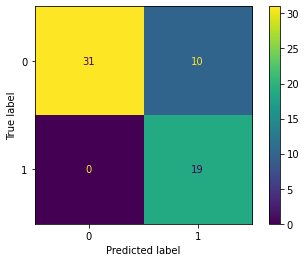

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(x_train ,y_train)

print(f'Accuracy on test data { clf.score(x_test,y_test)*100}*100 %')
print(f'Accuracy on train data {clf.score(x_train,y_train)*100} % ' )
print(plot_confusion_matrix(clf,x_test,y_test,values_format='0.3g'))

y_pred=clf.predict(x_test)
cf_r=classification_report(y_test,y_pred)
print('Classification Report :\n',cf_r)


# confusion_matrix(y_test,y_pred)

Performance is not good in predicting 0 class .

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
params={'n_estimators' :[100,150 ,50] ,
        'criterion':['gini' ,'entropy'],
      }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
classifier=RandomForestClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
random_search.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [ ]:
classi=RandomForestClassifier(criterion = 'gini' , n_estimators= 150)

In [ ]:
classi.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

In [ ]:
y_pred=classi.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

## Evaluation of the model

Accuracy on test data 100.0*100 %
Accuracy on train data 100.0 % 
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        19

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



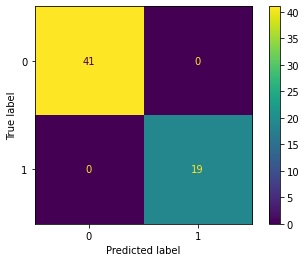

In [ ]:
print(f'Accuracy on test data { classi.score(x_test,y_test)*100}*100 %')
print(f'Accuracy on train data {classi.score(x_train,y_train)*100} % ' )
print(plot_confusion_matrix(classi,x_test,y_test,values_format='0.3g'))

cf_r=classification_report(y_test,y_pred)
print('Classification Report :\n',cf_r)


# confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

We got very good accuracy using Random Forest